In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline
import pandas as pd
import os
import seaborn as sns

# Cardiovascular Disease Detection

All of the dataset values were collected at the moment of medical examination.

Dataset Includes:
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) 
- Weight | Objective Feature | weight | float (kg)
- Gender | Objective Feature | gender | categorical code
- Systolic blood pressure | Examination Feature | ap_hi | int
- Diastolic blood pressure | Examination Feature | ap_lo | int
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
- Smoking | Subjective Feature | smoke | binary
- Alcohol intake | Subjective Feature | alco | binary
- Physical activity | Subjective Feature | active | binary
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary 

In [69]:
df = pd.read_csv(os.path.join('Resources', 'cardio_train.csv'))
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [70]:
df=df.drop('id', axis=1)

In [71]:
df.age = df.age.apply(lambda x: x / 365)

In [72]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [73]:
# combining height and weight into 1 -- BMI
df['bmi'] = round(df.weight/df.height * 100, 2)

In [74]:
df=df.drop(columns =['height', 'weight']) 

In [75]:
df = df[['age','gender','bmi','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]

In [76]:
df.head()

,age,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,44.52,130,80,2,2,0,0,1,0
1,40.131507,1,43.56,110,70,1,1,0,0,1,1
2,60.002740,1,42.42,120,80,1,1,0,0,1,0
3,39.860274,2,51.52,120,80,1,1,1,1,1,0
4,64.090411,1,40.00,120,80,1,1,0,0,1,0


In [77]:
# Assign X (data) and y (target)
X = df.drop("cardio", axis=1)
y = df["cardio"]
print(X.shape, y.shape)

(69301, 10) (69301,)


Split Data into Training and Testing

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Create a Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

 Fit (train) or model using the training data

In [80]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Validate the model using the test data

In [81]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7184415584415584
Testing Data Score: 0.7203624610412097


In [82]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7184415584415584
Testing Data Score: 0.7203624610412097


 Make predictions

In [83]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 1 0 0 1]
First 10 Actual labels: [0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [84]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
17321,0,0
17322,0,0
17323,0,1
17324,1,1


In [21]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1","l2"]}
model=LogisticRegression(solver="liblinear")
grid = GridSearchCV(model, param_grid, verbose=3)

In [22]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, penalty=l1, score=0.712, total=   1.5s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.713, total=   1.5s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.716, total=   1.8s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.724, total=   2.5s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.721, total=   2.1s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.712, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.714, total=   0.5s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.716, total=   0.5s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.724, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   37.3s finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [85]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.7175180375180376


In [86]:
 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["With Cardio", "Without Cardio"]))

                precision    recall  f1-score   support

   With Cardio       0.70      0.76      0.73      8684
Without Cardio       0.74      0.68      0.71      8642

      accuracy                           0.72     17326
     macro avg       0.72      0.72      0.72     17326
  weighted avg       0.72      0.72      0.72     17326



# ------------------------

SVM

In [25]:

from matplotlib import style
style.use("ggplot")

/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


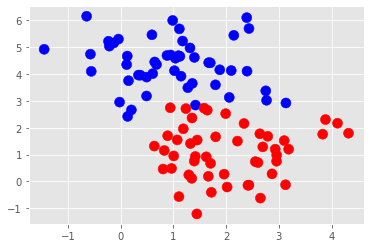

In [26]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [27]:
#DONT USE
# Not used often  makes fake data
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


KNN

In [28]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [30]:
 y = df["cardio"]
target_names = ["negative", "positive"]

In [31]:
 X = df.drop("cardio", axis=1)
X.head()

,age,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61.558904,1,44.52,130,80,2,2,0,0,1
1,40.131507,1,43.56,110,70,1,1,0,0,1
2,60.002740,1,42.42,120,80,1,1,0,0,1
3,39.860274,2,51.52,120,80,1,1,1,1,1
4,64.090411,1,40.00,120,80,1,1,0,0,1


In [32]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.629
k: 3, Train/Test Score: 0.817/0.661
k: 5, Train/Test Score: 0.777/0.678
k: 7, Train/Test Score: 0.761/0.683
k: 9, Train/Test Score: 0.752/0.688
k: 11, Train/Test Score: 0.746/0.691
k: 13, Train/Test Score: 0.738/0.692
k: 15, Train/Test Score: 0.735/0.693
k: 17, Train/Test Score: 0.732/0.696
k: 19, Train/Test Score: 0.730/0.695


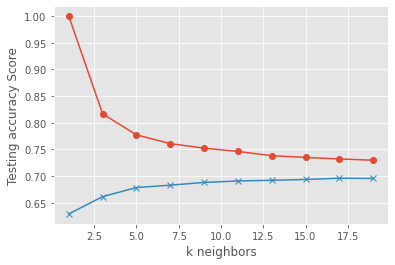

In [35]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [45]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.17f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.69583285236061410


/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


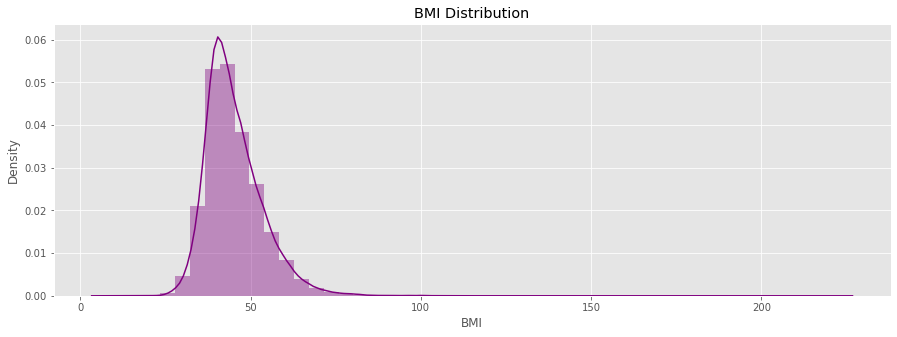

In [65]:
plt.figure(figsize=(15,5))
sns.distplot(df["bmi"], color="purple")
plt.title("BMI Distribution")
plt.ylabel("Density")
plt.xlabel("BMI");

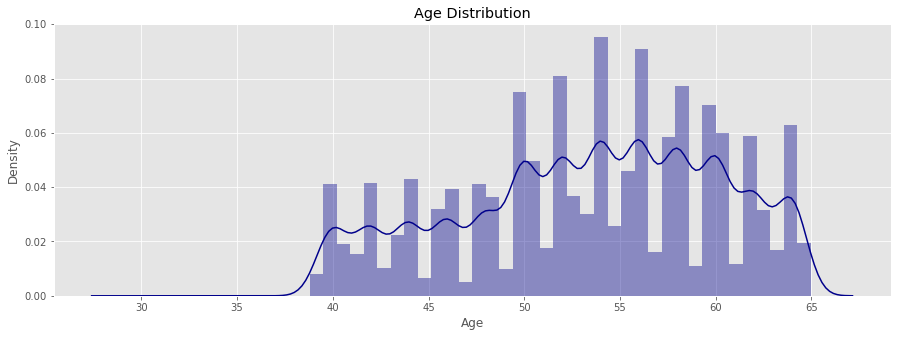

In [57]:
plt.figure(figsize=(15,5))
sns.distplot(df["age"], color="darkblue")
plt.title("Age Distribution")
plt.ylabel("Density")
plt.xlabel("Age");

/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


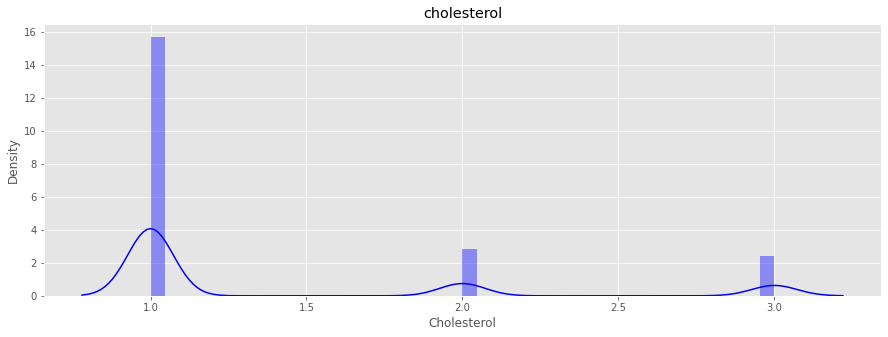

In [88]:
plt.figure(figsize=(15,5))
sns.distplot(df["cholesterol"], color="blue")
plt.title("cholesterol")
plt.ylabel("Density")
plt.xlabel("Cholesterol");

# ----------------------

In [87]:
y = cardio1.cardio
X = cardio1.drop("cardio", axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [88]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix 
import itertools

In [89]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [90]:
metrics.accuracy_score(y_test, y_pred)

0.718002982059545

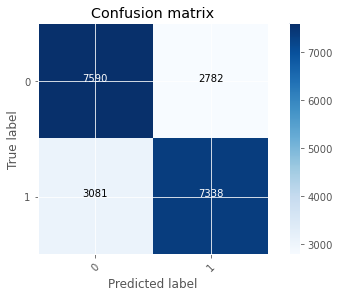

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = clf.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [92]:
## Plotting a heatmap to observe correlation 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
corr = cardio1.corr()

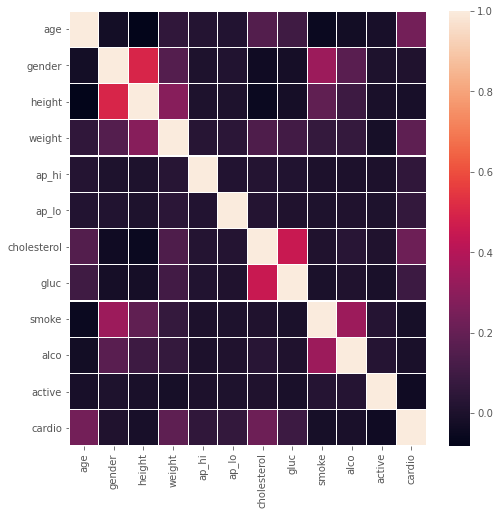

In [94]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, ax= ax, linewidth = 0.1 );

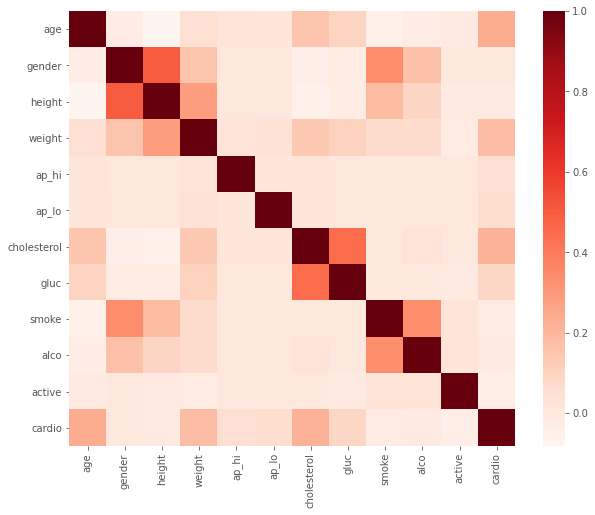

In [96]:
#plt.figure(figsize=(10,8))
#cor = cardio1.corr()
#sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
#plt.show()